<a href="https://colab.research.google.com/github/spacemaninSeoul/justpractice/blob/main/basic_tensorflow%26keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 텐서를 통한 표현

텐서(tensor)는 여러 형태를가질 수 있는 넘파이 배열(Numpy Array)이다. 텐서는 배열의 차원을 랭크(Rank)로 표현한다.

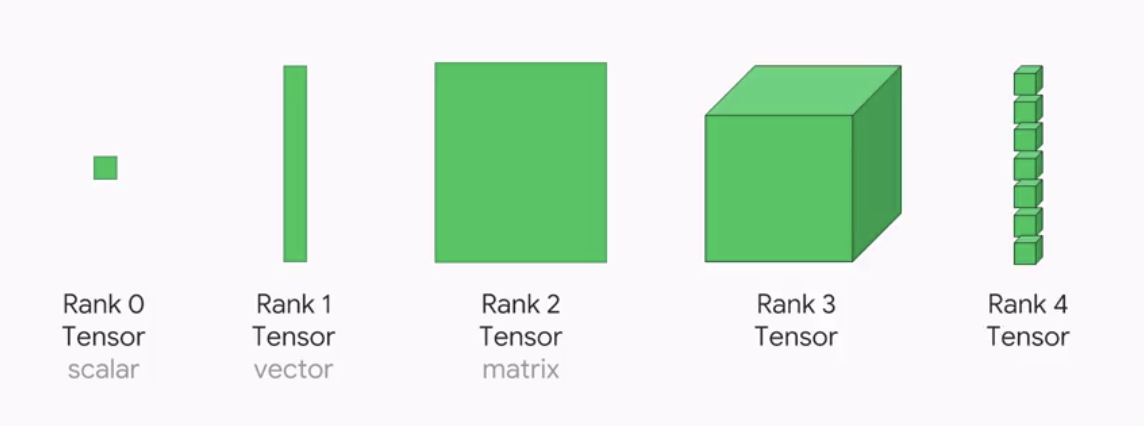

In [ ]:
import tensorflow as tf

In [ ]:
# 텐서의 차원과 기본 연산
a = tf.constant(2)
print(tf.rank(a))

tf.Tensor(0, shape=(), dtype=int32)


In [ ]:
b = tf.constant([1, 2])
print(tf.rank(b))

tf.Tensor(1, shape=(), dtype=int32)


In [ ]:
c = tf.constant([[1, 2], [3, 4]])
print(tf.rank(c))

tf.Tensor(2, shape=(), dtype=int32)


# 2. 즉시 실행 모드를 통한 연산

텐서플로 2.x 의 가장 큰 장점 중 하나는 즉시 실행 모드(Eager mode)를 지원한다는 것이다. 이를 통해 텐서플로를 파이썬처럼 사용할 수 있다.

In [ ]:
# 필요 모듈을 임포트한다.
import tensorflow as tf
import numpy as np

a = tf.constant(3)
b = tf.constant(2)

# 기본 연산
# 텐서 형태로 출력하기
print(tf.add(a, b)) # 더하기 
print(tf.subtract(a, b)) # 빼기

# 넘파이 배열 형태로 출력하기
print(tf.multiply(a, b).numpy())
print(tf.divide(a, b).numpy())

tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
6
1.5


넘파이 배열을 통해 함수를 적용하고 다시 텐서 연산을 수행하는 과정은 다음과 같다.
- numpy() 함수를 사용해 텐서를 넘파이 배열로 변환한다.
- 함수를 적용한다.
- tf.convert_to_tensor() 함수를 사용하여 텐서 형태로 다시 변환한다.

In [ ]:
# 텐서에서 넘파이로, 넘파이에서 텐서로
c = tf.add(a, b).numpy() # a, b를 더한 후 Numpy 배열로 변환.
c_square = np.square(c, dtype = np.float32) # Numpy 모듈에 존재하는 square 함수를 적용.
c_tensor = tf.convert_to_tensor(c_square) # 다시 텐서로 변환

# 넘파이 배열과 텐서 각각을 확인하기 위해 출력한다.
print('numpy array : %0.1f, applying square with numpy : %0.1f, convert_to_tensor : %0.1f' % (c, c_square, c_tensor))

numpy array : 5.0, applying square with numpy : 25.0, convert_to_tensor : 25.0


이를 통해 Numpy 모듈이 제공하는 기능뿐만 아니라 정의된 함수를 이용할 수 있다.

텐서플로에서 제공하는 수학에 고나한 계산은 tf.math 모듈에, 선형대수학에 관련된 계산은 tf.linalg 모듈에 있다.

In [ ]:
# 수학에 관한 모듈
# from tensorflow.math import sin, cos, tanh
# 선형대수학에 관련된 모듈
# from tensorflow.linalg import diag, svd, matrix_transpose

# 3. @tf.function

@tf.function은 텐서플로에서 자동으로 그래프를 생성(Auto Graph)해주는 기능이다. 이를 통해 파이썬으로 구성된 코드를 고효율의 텐서플로 그래프로 변환하여 사용할 수 있다. GPU 연산을 가능케하기 때문이다. 대표적으로 변환되는 함수는 다음과 같다.

- if -> tf.cond
- for/while -> tf.while_loop
- for _ in dataset -> dataset.reduce

파이썬으로 구성된 함수를 텐서플로 그래프 형태로 다루고 싶을 때 사용하면 좋다.

In [ ]:
@tf.function
def square_pos(x):
  if x > 0:
    x = x * x

  else:
    x = x * -1
  return x

print(square_pos(tf.constant(2)))

tf.Tensor(4, shape=(), dtype=int32)


# 4. 신경망


## 1) 퍼셉트론

신경망은 퍼셉트론(Perceptron) 알고리즘으로부터 시작한다. 퍼셉트론 알고리즘은 여러 개의 신호를 받아 하나의 신호를 출력한다.

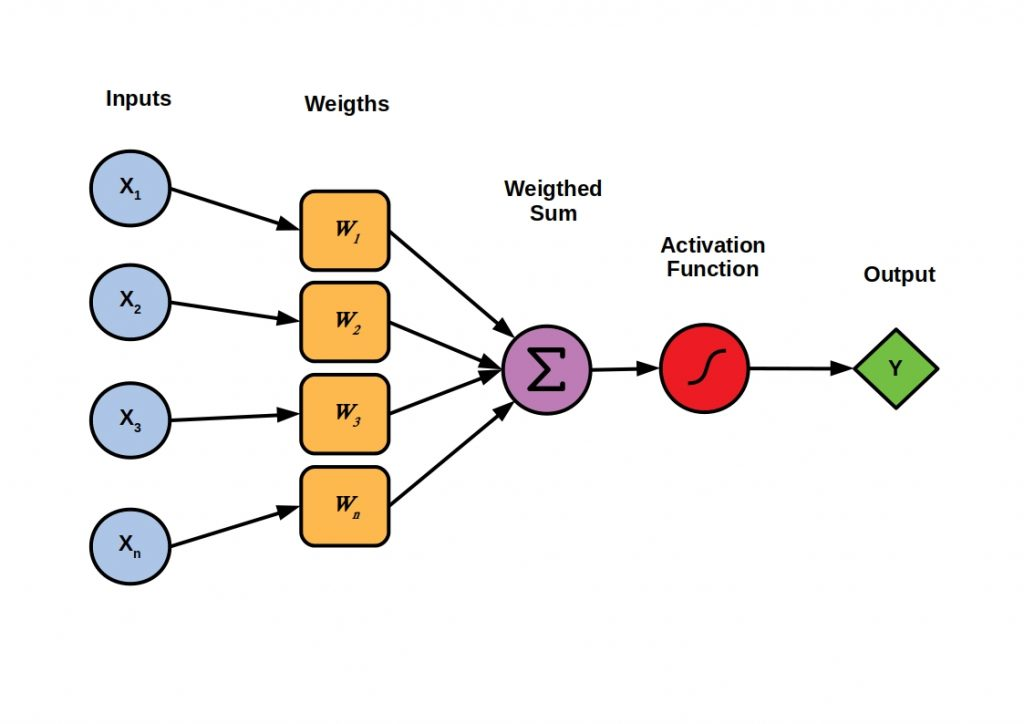

x1, x2는 입력, y는 출력, w는 가중치를 의미한다. 다른 표현으로 x는 데이터의 특성, y는 정답을 나타낸다.

퍼셉트론은 x와 가중치 w를 곱한 값을 모두 더하여 하나의 값(y)으로 만들어 낸다. 이를 임곗값(threshold)와 비교해 크면 1, 그렇지 않으면 0을 출력한다.

```
수식으로 y = { 1 (w1*x1 + w2*x2 > threshold)
           { 0 (w1*x1 + w2*x2 <= threshold)
```
이렇게 신경망에서 만들어진 값을 적절한 출력값으로 변환해주는 함수를 활성화 함수(Activation function)이라 한다. 이러한 과정을 퍼셉트론의 기본 단위이다.


이와 같이 단순히 0과 1을 출력하는 함수를 계단 함수(step function)이라고 한다. 최종 결괏값은 우리가 정해놓은 정답과 비교하게 되는데, 특정 알고리즘을 사용하여 최적값을 찾을 때까지 가중치를 업데이터하면서 학습을 반복하게 될 것이다. 이 과정을 통해 OR 게이트 문제를 해결해본다. 퍼셉트론을 이용하면 AND, NAND 게이트 또한 해결할 수 있다.


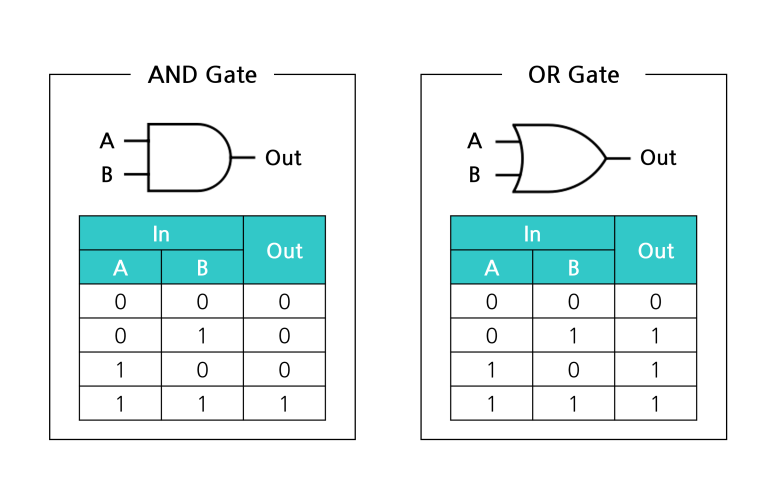

In [ ]:
# OR 게이트 구현하기
tf.random.set_seed(777) # 시드를 설정한다.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import mse

# 데이터 준비하기
x = np.array([[0 ,0], [1, 0], [0, 1], [1, 1]])
y = np.array([[0], [1], [1], [1]])

# 모델 구성하기
model = Sequential()
# 단층 퍼셉트론 구성하기
model.add(Dense(1, input_shape = (2, ), activation='linear'))

# 모델 준비하기
model.compile(optimizer = SGD(),
              loss = mse,
              metrics =['acc']) # list 형태로 평가지표를 전달한다.

# 학습시키기
model.fit(x, y, epochs = 500)

Epoch 1/500
1/1 [==============================] - 0s 495ms/step - loss: 1.4290 - acc: 0.5000
Epoch 2/500
1/1 [==============================] - 0s 9ms/step - loss: 1.3602 - acc: 0.5000
Epoch 3/500
1/1 [==============================] - 0s 10ms/step - loss: 1.2956 - acc: 0.5000
Epoch 4/500
1/1 [==============================] - 0s 7ms/step - loss: 1.2349 - acc: 0.5000
Epoch 5/500
1/1 [==============================] - 0s 16ms/step - loss: 1.1779 - acc: 0.5000
Epoch 6/500
1/1 [==============================] - 0s 12ms/step - loss: 1.1242 - acc: 0.5000
Epoch 7/500
1/1 [==============================] - 0s 12ms/step - loss: 1.0738 - acc: 0.5000
Epoch 8/500
1/1 [==============================] - 0s 9ms/step - loss: 1.0264 - acc: 0.5000
Epoch 9/500
1/1 [==============================] - 0s 11ms/step - loss: 0.9819 - acc: 0.5000
Epoch 10/500
1/1 [==============================] - 0s 13ms/step - loss: 0.9399 - acc: 0.5000
Epoch 11/500
1/1 [==============================] - 0s 7ms/step - loss:

이를 통해 OR 게이트 문제를 훌륭하게 해결할 수 있는 모델을 얻게 된다.

동일한 결과를 얻을 수 있는 이유는 tf.random.set_seed()함수 때문이다. 시드를 고정하면 랜덤으로 생성되는 모든 숫자에서 동일한 결과를 얻을 수 있다.

Dense층은 퍼셉트론을 자동으로 생성한다. 밀집층(Dense layer), 다층 퍼셉트론(MLP), 완전 연결층(fully-connected layer) 등 여러 가지 표현이 존재한다.

`Dense(1, input_shape = (2, ))`은 두 개의 특성을 가지는 1차원 데이터를 입력으로 받고, 한 개의 출력을 가지는 Dense층이라고 표현한다. 처음 전달해주는 인자 '1'은 퍼셉트론의 개수를 의미한다. 또는 이를 은닉 유닛(hidden unit)이라고도 표현한다.

위 코드의 Dense층이 위의 그림처럼 구성되었다면, 모델로부터 두 개의 가중치를 얻을 수 있어야 한다. OR 게이트는 데이터당 두 개의 특성(x1, x2)가 있기 때문이다.

In [ ]:
# 모델의 가중치 확인하는 방법
model.get_weights()

[array([[0.49431452],
        [0.37552655]], dtype=float32), array([0.3271933], dtype=float32)]

세 개의 값을 반환하고 있는데, 세 개중 두 개는 가중치에 해당하고, 나머지 한 개는 편향(bias)에 해당한다. 편향은 직선 함수에서 y 절편을 생각하면 이해하기 쉽다.

## 2) 다층 퍼셉트론(MLP; Multi-Layer Perceptron)

다층 퍼셉트론(Multilayer perceptron, MLP)은 퍼셉트론을 여러층 쌓은 순방향의 인공 신경망이다.

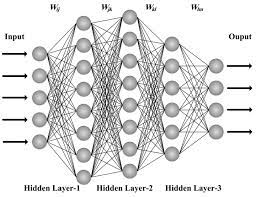

하지만 퍼셉트론에도 한계가 존재한다. XOR 게이트 문제를 해결하지 못한다는 점이다.

XOR(exclusive OR) 게이트는 두 개의 입력 A와 B를 받아 입력 값이 같으면 0을 출력하고, 입력 값이 다르면 1을 출력한다.
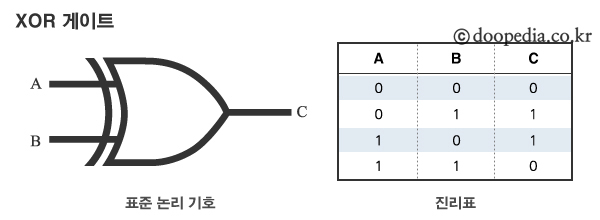

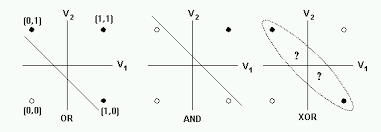

XOR 게이트 그래프에서 한 선으로 검은점과 흰점을 구분할 수가 없다. 선을 더 추가하면 가능할 것 같은데 이때 다층 퍼셉트론을 이용한다.

퍼셉트론에서 모델의 출력값은 '입력값과 가중치를 곱하여 모두 더한 것'이다. 퍼셉트론을 여러 개 쌓게 되면 수많은 가중치를 다루어야 한다. 실제로 사용하는 퍼셉트론은 매우 복잡한데, 이를 단순하고 효율적으로 계산하기 위해 벡터화(vectorization)를 이용하며, 내적을 통해 연산을 수행한다.

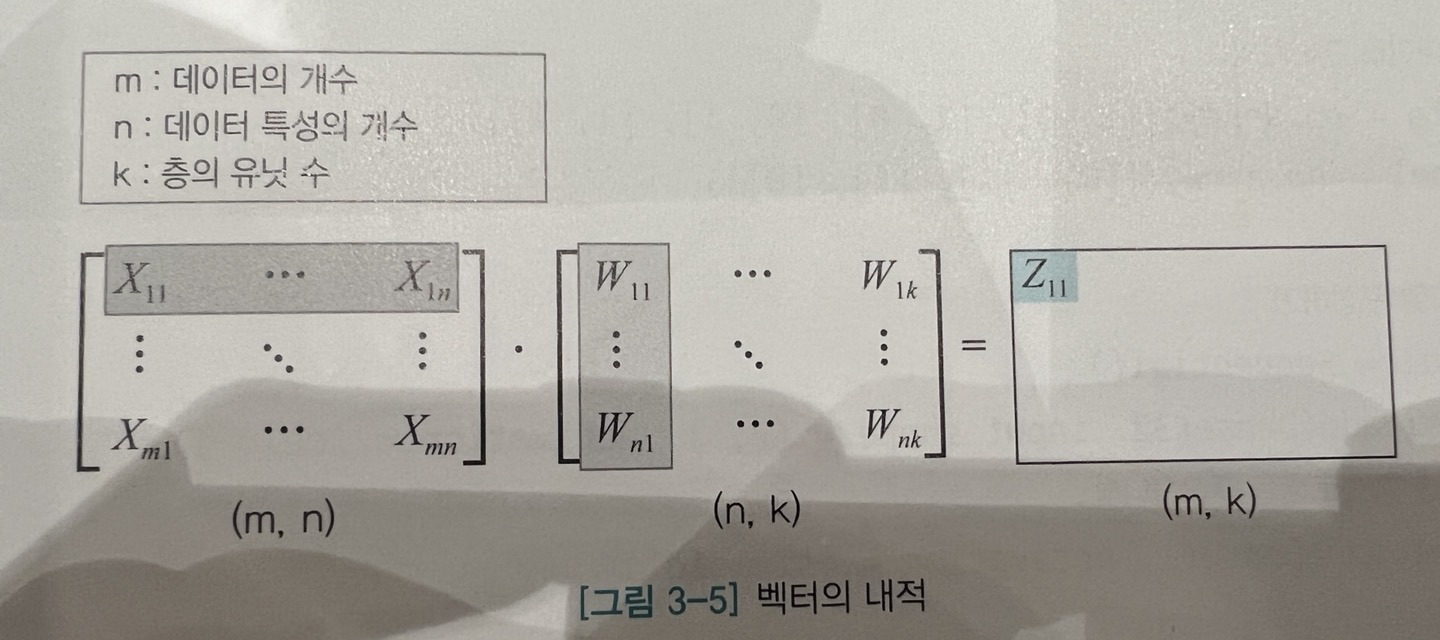

In [ ]:
# 벡터의 내적
x = tf.random.uniform((10, 5)) # uniform 분포에서 해당 크기만큼 난수를 생성한다. 10행 5열
w = tf.random.uniform((5, 3))
d = tf.matmul(x, w) # (10, 5) * (5, 3)

print(f'x와 w의 벡터 내적의 결과 크기:{d.shape}')

x와 w의 벡터 내적의 결과 크기:(10, 3)


In [ ]:
# XOR 게이트 구현하기. 다층 퍼셉트론
tf.random.set_seed(777) # 시드 설정.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import mse

# 데이터 준비
data = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
label = np.array([[0], [1], [1], [0]])

# 모델 구성
model = Sequential()
model.add(Dense(32, input_shape = (2, ), activation='relu'))
# 다층 퍼셉트론을 구성한다.
model.add(Dense(1, activation='sigmoid'))

# 모델 준비
model.compile(optimizer = RMSprop(),
              loss = mse,
              metrics = ['acc'])

# 학습시키기
model.fit(data, label, epochs =100)

Epoch 1/100
1/1 [==============================] - 1s 802ms/step - loss: 0.2646 - acc: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 0.2621 - acc: 0.2500
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 0.2603 - acc: 0.2500
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 0.2589 - acc: 0.2500
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 0.2578 - acc: 0.2500
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 0.2568 - acc: 0.2500
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 0.2558 - acc: 0.2500
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 0.2550 - acc: 0.2500
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2541 - acc: 0.2500
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 0.2533 - acc: 0.2500
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss: 0

첫 번째 Dense층에서 32개의 퍼셉트론을 사용한 걸 알 수 있다. 퍼셉트론을 여러 개 쌓음으로써 XOR 문제를 해결한 것이다.

위의 코드와 또 다른 점은 비선형 활성화 함수를 사용했다는 것이다. (Dense층의 'activation' 인자) 대표적으로 시그모이드(sigmoid), 하이퍼볼릭 탄젠트(tanh), ReLU 활성화 함수가 있다. 

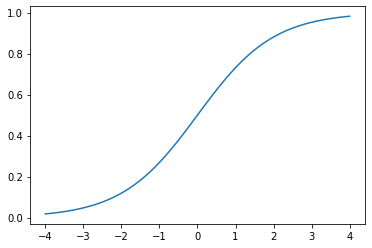

In [ ]:
# 여러 가지 활성화 함수
import matplotlib.pyplot as plt
import math

# 시그모이드 함수
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# 하이퍼볼릭 탄젠트 함수
def tanh(x):
  return list(map(lambda x : math.tanh(x),x))

# relu 함수
def relu(x):
  result = []
  for ele in x:
    if(ele <= 0):
      result.append(0)
    else:
      result.append(ele)
  return result

# 시그모이드 함수 그리기
x = np.linspace(-4, 4, 100)
sig = sigmoid(x)
plt.plot(x, sig)
plt.show()

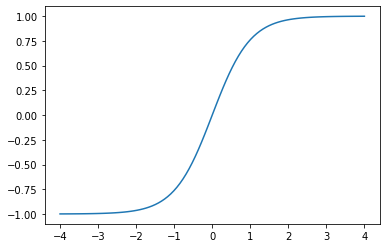

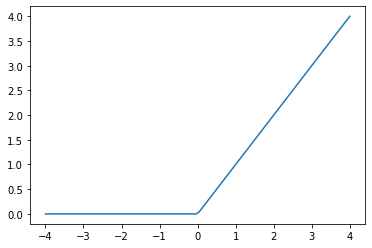

In [ ]:
# tanh, relu 함수 그리기
for i in (tanh(x), relu(x)):
  model = i
  plt.plot(x, model)
  plt.show()

## 3) 경사하강법

신경망은 가중치를 업데이트하면서 주어진 문제를 최적화한다. 이때, 가중치를 업데이트하는 방법에 대표적으로 경사하강법(Gradient Descent)를 사용한다. 경사하강법은 특정 함수에서의 미분을 통해 얻은 기울기를 이용해 최적의 값을 찾아가는(손실을 줄이는) 방법이다.

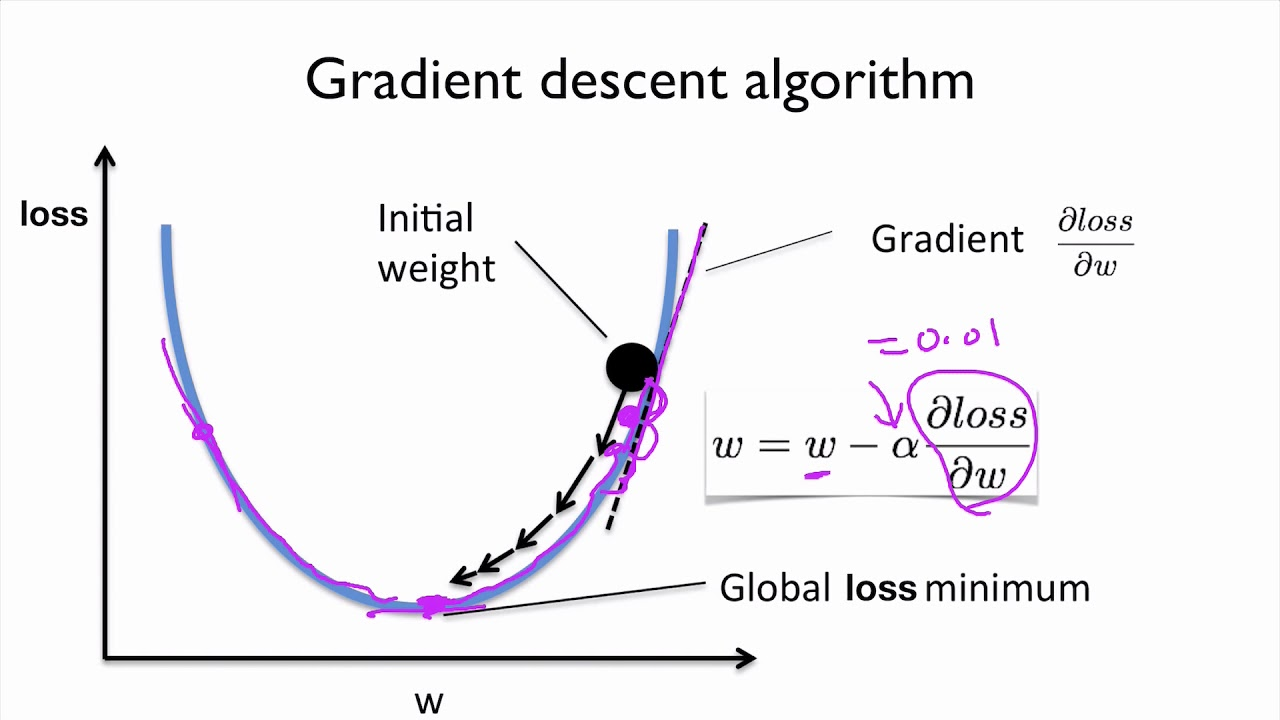

그림 안의 수식에서 a(또는 lr, learning rate)로 표현되고 있는 학습률을 사용한다. 학습률은 모델의 학습에서 학습 속도나 성긍에 큰 영향을 끼치는 중요한 파라미터이다.

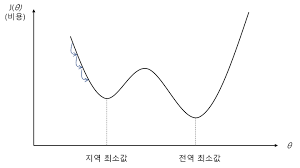

이와 같은 경우때문에 경사하강법이 항상 최적값을 반환한다는 보장을 할 수 없다. 따라서 실제로 모델을 학습할 경우에는, 여러 가지 학습률을 사용해볼 필요가 있다. 학습률이 너무 높으면 학습이 되지 않을 수 있고, 학습률이 너무 낮으면 학습 속도가 아주 느려서 전역 최솟값에 도달하기 전에 학습이 종료될 수 있기 때문이다.

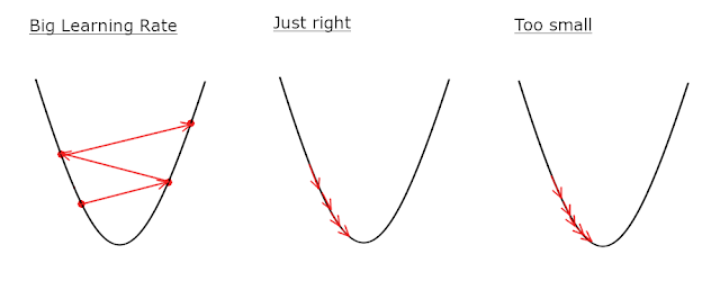

학습률의 초기 설정으로는 주로 0.001(1e-3)을 사용한다. 모델이 학습되지 않은 상태라면 큰 학습률부터 시작하고, 어느 정도 학습이 된 경우엔 서서히 학습률을 줄여나가 본다.

신경망의 올바른 학습을 위해서는 가중치 초기화(weight initialization) 문제를 고려해봐야 한다. 지역 최솟값이 존재하는 위의 그림에서, 우리는 최고의 성능을 위해 전역 최솟값을 선택할 것이다. 이를 '초기화한다'고 표현할 수 있다.

좋은 성능을 얻기 위해서는 올바른 가중치 초기화를 진행해야 한다. 특별한 경우가 아닌 이상, 보통 케라스가 제공하는 기본 초기화 설정을 사용해도 큰 문제가 되지 않는다.

대표적으로 Glorot(Xavier), he, Lecun 초기화가 있으며, tf.keras.initializers에서 확인할 수 있다. 보통 배치 단위를 사용하여 학습을 진행하는데, 이 때의 경사하강법을 확률적 경사하강법(SGD, Stochastic Gradient Descent)이라고 한다.

다음 코드를 통해 학습률의 변화에 따라 점들이 어떻게 찍히는지 알 수 있다. 학습률이 낮은 경우(lr=0.001)엔 학습 속도가 매우 느리고, 학습률이 높은 경우(lr=0.9)엔 최적 지점에 도달하지 못하는 것을 확인할 수 있다. 이를 통해 적절한 학습률(lr=0.1 또는 lr=0.3)을 선택하는 것이 성능에 큰 차이를 줄 수 있음을 알 수 있다.

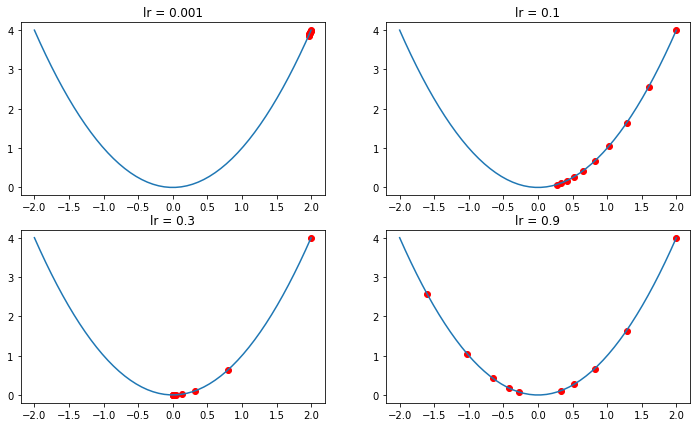

In [ ]:
# 경사하강법 실험해보기
lr_list = [0.001, 0.1, 0.3, 0.9] # 여러 가지 학습률을 사용하여 값의 변화를 관찰한다.

def get_derivative(lr):

  w_old = 2
  derivative = [w_old]

  y = [w_old ** 2] # 손실 함수를 y = x^2로 정의한다.

  for i in range(1, 10):
    # 먼저 해당 위치에서 미분값을 구한다.
    dev_value = w_old * 2

    # 위의 값을 이용하여 가중치를 업데이트한다.
    w_new = w_old - lr * dev_value
    w_old = w_new

    derivative.append(w_old)
    y.append(w_old ** 2)

  return derivative, y

x = np.linspace(-2, 2, 50) # -2~2의 범위를 50구간으로 나눈 배열을 반환한다.
x_square = [i ** 2 for i in x]

fig = plt.figure(figsize=(12, 7))

for i, lr in enumerate(lr_list):
  derivative, y = get_derivative(lr)
  ax = fig.add_subplot(2, 2, i+1)
  ax.scatter(derivative, y, color='red')
  ax.plot(x, x_square)
  ax.title.set_text('lr = ' + str(lr))

plt.show()

## 4) 역전파

신경망을 학습시키는 방법이 역전파 알고리즘(Backpropagation Algorithm)이다. 우리가 주어진 문제를 해결하기 위해 구성한 모델에서 수많은 가중치를 무작위로 설정한 뒤 결괏값을 도출하고, 이를 정답과 비교하여 가중치를 다시 조정하는 과정에서 사용한다.

다층(multilayer)이고, 순행 공급(feedforward) 신경망에서 사용되는 학습 알고리즘이며, 학습 방법은 지도 학습(supervised learning)이다. 즉, 학습을 하기 위해서는 입력 데이터와 원하는 출력(o) 데이터가 있어야 한다. 입력이 신경망의 가중치(weights)와 곱하고 더하는 과정을 몇 번 반복하면 입력의 결과 값인 출력(y)이 나온다. 이때 출력(y)은 학습 데이터에서 주어진 원하는 출력(o)과 다르다. 결국, 신경망에서는 (y - o)만큼의 오차(e = y - o)가 발생하며, 오차에 비례하여 출력층의 가중치를 갱신하고, 그다음 은닉층의 가중치를 갱신한다. 가중치를 갱신하는 방향은 신경망의 처리 방향과는 반대이다. 이런 이유로 역전파 알고리즘이라고 한다.

[네이버 지식백과] 역전파 알고리즘 [backpropagation algorithm] (실험심리학용어사전, 2008., 곽호완, 박창호, 이태연, 김문수, 진영선)



역전파에서는 미분 개념을 이용한 체인 룰(Chain Rule, 연쇄 법칙)을 이용한다. 이를 통해 계산량이 줄어들어 더 빠른 속도로 모델을 학습할 수 있다.
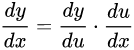

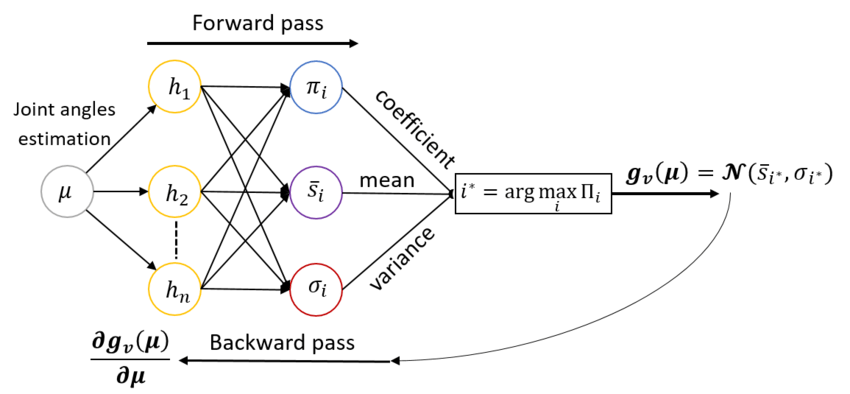

대부분의 딥러닝 라이브러리는 자동 미분(Auto-off) 기능을 지원한다. 따라서 여기에선 '신경망의 가중치가 역전파를 통해 업데이트된다'는 것을 알고 있어도 충분하다.

# 5. 케라스에서의 개발 과정

케라스에서는 다음 과정을 필수적으로 거친다.

1. 학습 데이터를 정의한다.
2. 데이터에 적합한 모델을 정의한다.
3. 손실 함수, 옵티마이저, 평가지표를 선택하여 학습 과정을 설정한다.
4. 모델을 학습한다.
5. 모델을 평가한다.



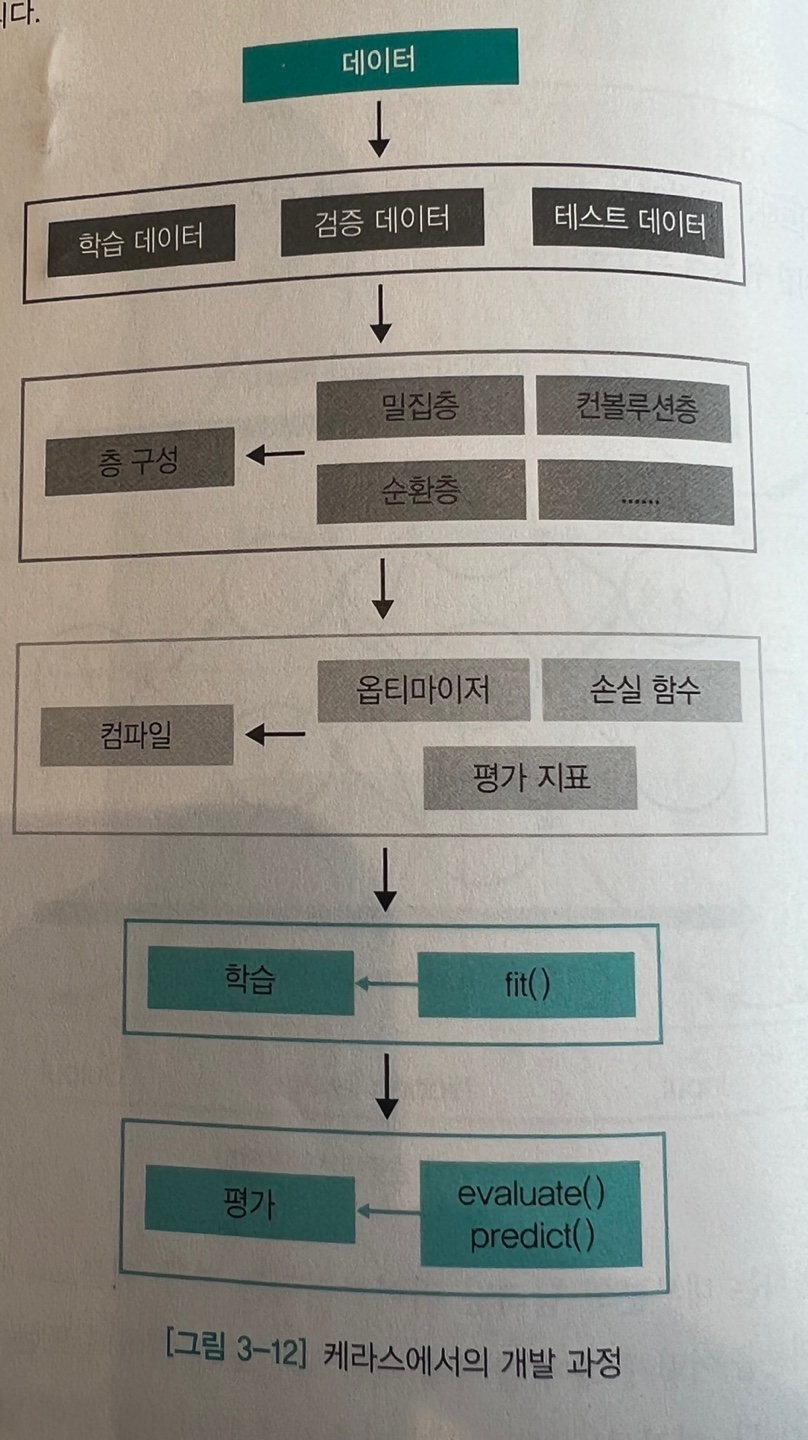

## 1) 모델 구성
케라스에서 모델을 구성하는 방법은 층을 차례대로 쌓는 tf.keras.Sequential과 더 유연한 구조를 만들 수 있는 함수형 API(Functional API)가 있다. 이는 추후에 다루도록 한다.

In [31]:
# 예시 : Sequential()을 사용한 모델 구성
model = Sequential()
model.add(Dense(32, input_shape = (2, ), activation= 'relu'))
model.add(Dense(1, activation ='sigmoid'))


위으 모델에서 두 개의 Dense층이 연결되어 있다.
항상 모델의 첫 번째 층은 데이터의 형태(위의 코드에서 input_shape 인자)를 전달해주어야 한다는 점을 기억해야 한다. 두 번째 층부터는 자동으로 이전 층의 출력 형태가 입력 형태로 지정되어 사용된다.

## 2) 모델 컴파일
모델을 구성했다면 컴파일(compile) 함수를 호출하여 학습 과정을 설정한다.

In [32]:
# 예시 : model.compile()
# 평균 제곱 오차 회귀 문제
model.compile(optimizer = RMSprop(),
              loss = 'mse',
              metrics = ['acc'])

# 이항 분류 문제
model.compile(optimizer = RMSprop(),
              loss = 'binary_crossentropy',
              metrics = ['acc'])

# 다향 분류 문제
model.compile(optimizer = RMSprop(),
              loss = 'categorical_crossentropy',
              metrics = ['acc'])


model.compile() 함수에서는 크게 세 가지를 설정해주어야 한다.

- **옵티마이저(optimizer)** : 최적화 방법을 설정한다. 대표적으로 SGD(), RMSprop(), Adam(), NAdam() 등이 있다. 옵티마이저를 설정하는 다른 방법으로 'sgd', 'rmsprop', 'adam'과 같이 문자열로 지정하여 전달할 수 있다. tf.keras.optimizers 모듈에서 다양한 옵티마이저를 볼 수 있다.
https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

- **손실 함수(loss function)** : 학습 과정에서 최적화시켜야 할 손실 함수를 설정한다. 대표적으로 평균 제곱 오차(mse: mean_squared_error), binary_crossentropy, categorical_crossentropy가 있으며, 문자열로 지정하여 사용할 수 있다. tf.keras.losses 모듈에서 다양한 손실 함수를 볼 수 있다.
https://www.tensorflow.org/api_docs/python/tf/keras/losses

- **평가지표metrics**' 학습 과정을 모니터링하기 위해 설정한다. 객체를 호출하거나 'acc'와 같이 문자열을 지정하여 전달할 수 있으며, 직접 정의하여 사용하기도 한다. tf.keras.metrics 모듈에서 다양한 평가지표를 볼 수 있다.
https://www.tensorflow.org/api_docs/python/tf/keras/metrics

## 3) 모델 학습
다음으로 model.fit() 함수를 호출하여 모델을 학습시킨다.

In [33]:
# 예시 : model.fit()
model.fit(data, label, epochs =100)

model.fit(data, label, epochs = 100, validation_data = (val_data, val_label))


Epoch 1/100
1/1 [==============================] - 1s 896ms/step - loss: 0.0000e+00 - acc: 0.7500
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0000e+00 - acc: 0.7500
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 0.0000e+00 - acc: 0.7500
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - acc: 0.7500
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 0.0000e+00 - acc: 0.7500
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - acc: 0.7500
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - acc: 0.7500
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 0.0000e+00 - acc: 0.7500
Epoch 9/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0000e+00 - acc: 0.7500
Epoch 10/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0000e+00 - acc: 0.7500
Epoch 11/100
1/1 [============

NameError: ignored

fit() 함수에서는 입력 및 정답 데이터로 이루어진 학습 데이터와 함께 주로 세 가지를 추가로 설정한다.

- **에폭(epochs)** : 전체 학습 데이터를 몇 회 반복할지 결정한다.
- **배치 크기(batch_size)** : 전달한 배치 크기만큼 학습 데이터를 나누어 학습을 진행한다.
- **검증 데이터(validation_data)** : 모델의 성능을 모니터링하기 위해 사용한다. 입력과 정답 데이터로 이루어진 검증 데이터를 전달하면 1회 에폭이 끝날 때마다 전달된 검증 데이터의 손실과 평가지표를 출력한다.

## 4) 평가 진행

마지막으로 평가를 진행한다. 평가를 위해 사용할 함수 evaluate()와 predict()는 tf.keras.Model 모듈 아래에 존재하기 때문에 정의한 모델에서 바로 사용할 수 있다.

In [34]:
# 예시 model.evalueate(), model.predict()
model.evaluate(data, label)

1/1 [==============================] - 0s 279ms/step - loss: 0.0000e+00 - acc: 0.5000


[0.0, 0.5]

In [35]:
result = model.predict(data)
print(result)

[[0.39329308]
 [0.33419755]
 [0.23868987]
 [0.18259609]]


evaluate() 함수를 사용하면 차례대로 손실과 평가지표에 대한 정보를 확인할 수 있다. predict() 함수를 사용하면 모델의 마지막 층의 형태와 동일한 형태를 가진 추론값을 데이터 개수만큼 반환해준다.